<a href="https://colab.research.google.com/github/untergeekDE/hacktribe/blob/main/scripts/HackTribing_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**How to run this thing:** *Click the "Open in Colab" button above. Colab is free to use, but you need a Google account, e.g. an Android, Gmail or Youtube user. 

# HackTribing Notebook

**Don't want to mess with installing Python, or (God beware!) Linux, on your PC?** 

This Notebook - a mixture of explanations and runnable code - will run on a virtual machine with Google (for free!), which has Python and a lot of Linux tools pre-installed. 

**This is like a book that can do things with code.** It should do the work for you - all you have to do is to upload and download the files you want to have changed, and click "Run" on each of the code cells. 

Run each code cell by clicking on the small arrow button left of it, one after the other.

## You've got a RedTribe Sampler, haven't you?

This is for people trying to patch their red (or black) Electribe 2S sampler. If you've got the blue (or grey) synth version, there will be another notebook for you. 

## You've got a computer, haven't you?

Well, obviously. You are sitting in a computer connected to the Internet. You will also need that computer to read and write the SD card from your Electribe. (If you haven't got an SD card yet, don't worry: get a run-of-the-mill SD memory card - 4GB will be enough, but you probably will find 16GB or 32GB, which is OK - turn on your Tribe, insert the card, and navigate the Menu to DATA UTILITY (28/29), then select CARD FORMAT (12/14) - only if you have got a blank card, of course. 

## You have no fear of damaging your e2s, have you?

Well, you don't have to. Everything you do is reversible - if you don't like the HackTribe firmware, you may go back to the standard firmware (the last paragraph of this notebook tells you how). 

But of course, by fumbling with free third-party software, you step over a line the manufacturer drew for your safety. It might void you warranty, make your music demonic, corrupt your partner's morality, teach your children swear words, etc. etc. And none of all those volunteer software authors like bangcorrupt or me is going to take any responsibility for any of this. 

## You can read, can you?

Loads of text here - but while you may just skip over the computer code in the grey boxes, I would ask you politely to Read. Every. Bloody. Step. 

Most of the work will be done by the code in the workbook. Whenever it needs you to do something, it will tell you: 

### *IT'S YOUR TURN: Could you click RUN on this code box, please?*

In [ ]:
# A simple way of hiding readable text from humans
def rot13(sentence):
    d = {}
    for ascii_code in (65, 97):
        for alphabet_index in range(26):
            d[chr(ascii_code + alphabet_index)] = \
                        chr(ascii_code + (alphabet_index + 13) % 26)
    return ''.join([d.get(letter, letter) for letter in sentence])

# No need to understand what the code does if you don't want to!
print(rot13("Rkpryyrag. Lbh'er qbvat terng!!!"))

Did it say "Excellent" in the output field above? 

# Okay, let's get going!

## Step 1: Prepare your Electribe

If you want to keep your work, you should export your RedTribe's factory samples, and your patterns, to your SD card. 

### *It's your turn: Export samples and patches from your E2S to an SD card. *

* Insert the card. 
* Navigate the menu to DATA UTILITY (28/29), then select and execute EXPORT ALL PATTERN (2/14).
* Stay in the DATA UTILITY menu, select and execute EXPORT ALL SAMPLE (11/14). 

Switch off your Tribe, take the SD card to your computer, and have a look at it: 

* In the folder ```KORG/electribe sampler/```, you will find a file name ```electribe_sampler_allpattern.e2sallpat``` containing your patterns.
* in the folder ```KORG/electribe sampler/sample``` containing ```e2sSample.all```, a dump of all your samples. 

We will get to the files later - but you know where they are now. **And please keep the files on the card, don't erase them - if you want to reverse the hack, you will need these filesm.** Now let's prepare our virtual machine. 

## Step 2: Download the HackTribe code. 

It's as simple as clicking on the RUN button. 

In [ ]:
# Get the Hacktribe code. 
!git clone --recursive https://github.com/untergeekDE/hacktribe.git

**What you have just done:** You have told the computer to download bangcorrupt's Hacktribe scripts onto your virtual machine's harddisk memory 

**Where has it gone?** Look - there's a small folder symbol to the very right of the screen. Click it, and then click on the small triangle next to the "hacktribe" folder to show what is in there. 

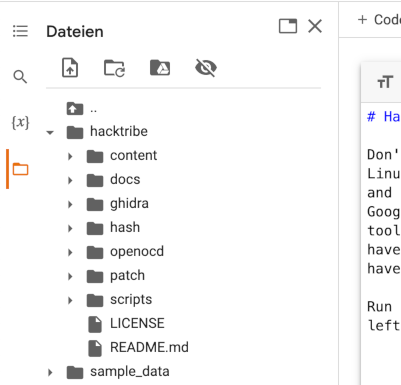

If you use your mouse pointer on the "hacktribe" folder, you will notice three small vertical dots appearing right to it. Clicking on those dots brings you a context menu you will need to upload your  ```.e2sallpat``` file with the firmware later on.  

**What to do next:** Prepare our virtual machine to run the Hacktribe scripts. 

## Step 3: Prepare this Notebook for running the code. 

Once again, just click RUN. 

In [ ]:
# Python libraries you will need to run the scripts
!pip install argparse bsdiff4 

The virtual machine might ask you to "restart the runtime" - never mind: just click on the small but friendly "RESTART RUNTIME" button and move on. 

**What to do next:** Get the firmware for patching. 

## Step 4: Download original firmware file from Korg. 

When you click RUN, the book gets the ```SYSTEM.VSB``` file containing Korg's most recent V2.02 firmware. 

In [ ]:
# Get Sampler firmware update from Korg server
!wget https://cdn.korg.com/us/support/download/files/0b87bcd3112fbb8c0ad7b0f55e618837.zip
# Unpack and copy to our Hacktribe directory
!unzip -o "0b87bcd3112fbb8c0ad7b0f55e618837.zip"
!cp /content/electribe_sampler_system_v202/SYSTEM.VSB /content/hacktribe/SYSTEM.VSB

**What you have just done:** Made the virtual machine download and unpack the original Sampler firmware. (If you look at the folders to the left and click the "Reload" 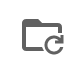symbol - the small folder with a circular arrow - you will see the SYSTEM.VSB sitting on the bottom of your hacktribe folder.

**What's next: Patch the firmware.** Use the Notebook to read the SYSTEM.VSB file and create the HackTribe firmware file from it. 

## Step 5: Creating the HackTribe firmware file

Click RUN, and get a new firmware file called ```hacked-SYSTEM.VSB``` for you to download to your E2S. 

In [ ]:
import os

# Use Python to change directory, otherwise the script won't find it
os.chdir("/content/hacktribe")
# Execute patch script
!python scripts/e2-firmware-patch.py
# Copy patched firmware to a new folder for download
!mkdir /content/hacktribe-output
!cp /content/hacktribe/hacked-SYSTEM.VSB /content/hacktribe-output/SYSTEM.VSB

# Download the SYSTEM.VSB file to computer's download directory
from google.colab import files
files.download("/content/hacktribe-output/SYSTEM.VSB")


**What you have just done:** You told your virtual machine to run bangcorrupt's Python script that creates a patched version of the firmware, and downloaded it as SYSTEM.VSB to the download folder of your computer. 

### *IT'S YOUR TURN: Copy that file to ```KORG/electribe sampler/System/SYSTEM.VSB```*

This is where the Electribe's standard firmware will go looking for updates. (If you already had a copy of SYSTEM.VSB in your computer's download folder, it may have been renamed to SYSTEM(1).VSB or something like that; please be sure that the file on the SD card is really named ```SYSTEM.VSB```.)

You could now take that SD card, insert it in your RedTribe, and select FIRMWARE UPDATE from the DATA UTILS menu. But hang on a bit longer - let's prepare additional data. 

**What's next:** Create a version of the factory samples to work with the HackTribe. 

## Step 6: Transform your existing material to work with the Hacktribe

In the factory version of a RedTribe, oscillators 1-18 are the base synthesizer models, and oscillators from 19-421  are the factory samples. In the Hacktribe, oscillators from 19-274 are the extended synth models: Multiwave, Crossmod (FM), and VPM models in lots of variations; the factory sample memory may no longer be used for, well, samples. But there is still the user memory.

The factory samples have to move - the Hacktribe firmware can cope with anything that is loaded to the user sample slots 501-999. 

We will run a script that **moves the factory samples from 19-421 to the user sample slots 519-921** (leaving the first 18 slots unused/for user samples, but making it easier to look the samples up), and **fills the remaining sample slots** with as much user samples as possible or necessary. 

Hold on, there's a problem: Your old patterns and parts don't know about this. They still go looking for the HIPPY kick drum as oscillator 019, not as It would be a hassle if you had to change all your existing patterns. The script does that for you: It modifies your all-pattern dump to **change all the parts in all the patterns to work with the new sample locations**. 

Before we can do that, we will have to get the sample and patch data from your Electribe - remember that you exported it to the SD card before we started. 

### IT'S YOUR TURN: Upload the files to the Notebook.

Click RUN on the next code box and select the ```e2sSample.all``` file from your SD card. 


In [ ]:
from google.colab import files
files.upload()

# Move it to hacktribe directory
# "/content/hacktribe/e2sSample.all"
!mv ./e2sSample.all /content/hacktribe-output/e2sSample.all
!mv ./es

Great! Now upload the ```electribe_sampler_allpattern.e2sallpat``` file from your card. 

In [ ]:
from google.colab import files
files.upload()

# Move to hacktribe directory
!mv ./electribe_sampler_allpattern.e2sallpat /content/hacktribe/electribe_sampler_allpattern.e2sallpat

**What you have just done:** You have given the notebook your work files so that it can rework them for you to use them with the Hacktribe. 

Once again, click RUN on the next code box. 

In [ ]:
# Script processing the sample bank and the pattern bank files for use with the HackTribe. 
import os
os.chdir("/content/hacktribe")
# Reorder sample bank and pattern memory, generating two files
!python scripts/e2_recode_sample_pat.py -o /content/hacktribe-output

# If you want to start with as little sample memory as possible, add "--minimal" flag above: 
#  !python scripts/e2_recode_sample_pat.py --minimal


## This Step Is Optional: Generate .WAV files for all samples

The last step may have removed samples from your library for the HackTribe - this code generates a directory of individual .WAV files, one for each sample, which you might copy to your SD card and import as needed. 

WAV files are stored in the ```output``` directory. Unfortunately, Colab does not allow you to download whole folders, so the Notebook creates a ZIP archive file from them for you to download. 

The files in the ZIP archive look like Windows WAV files - and may be played with VLC or any media player - but they contain a metadata block for the Electribe, so if you edit them, you will lose all metadata - e.g. start, end, and loop points, and the slicing data. Better not edit them.

In [ ]:
import os

# Use Python to change directory, otherwise the script won't find it
os.chdir("/content/hacktribe")
# Execute script to generate individual .WAV files for each sample in ./output directory
!python scripts/e2_sample_all_to_wav.py -o /content/hacktribe-output/wavefiles
!zip -r /content/hacktribe-output/wavefiles/ /content/hacktribe-output/wavefiles.zip

from google.colab import files
files.download("/content/hacktribe-output/wavefiles.zip")

**What you have just done:** Created and downloaded an archive of individual WAV sample files for you to import into your Electribe as needed. 

## Step 7: Copy the new files to your SD card. 

It's time to download the generated files to the SD card, and convert your Electribe into a HackTribe with it. The files are in the folder ```hacktribe-output``` now; the code box will just download it to the download folder on your system.  

In [ ]:
!mv /content/hacktribe-output/hacktribeSample.all /content/hacktribe-output/e2sSample.all

from google.colab import files
files.download("/content/hacktribe-output/SYSTEM.VSB")
files.download("/content/hacktribe-output/e2sSample.all")
files.download("/content/hacktribe-output/hacktribe.e2sallpat")

### *IT'S YOUR TURN: Copy the files to the SD card - to the right locations. 

The files are in the download directory of your computer - from there, move or copy them to the SD card: 

- You have already copied the  ```SYSTEM.VSB``` file to the ```KORG/electribe sampler/``` folder.

Now, copy the modified sample and pattern data to the SD card: 
- For the ```e2sSample.all``` file, you need to create a directory on the SD card called ```KORG/hacktribe/Sample/``` and move it there - the HackTribe firmware will automatically load it from there on boot. 
- ```hacktribe.e2sallpat``` may live anywhere on your SD card where you can find it - I'd propose to copy it into the ```KORG/hacktribe```  directory.

**What you have just done:** Prepared everything for the final step. 

## Final Step: Install the HackTribe firmware

Insert the SD card in your e2s. Navigate to the DATA UTILITY menu and select FIRMWARE UPDATE. (This needs a SYSTEM.VSB file in the ```KORG/electribe sampler/System``` directory.) 

Take a deep breath. This is customary.

Press OK. 

When rebooting, the screen will show "HackTribe" now, and the firmware will start loading the samples automatically. **Congratulations: You succeeded!**

### Update patterns

* Go to the 

# Going back to the standard firmware

To reverse the hack, take your SD card. There is only one more file you will have to copy: The original ```SYSTEM.VSB``` has to go to the ```KORG/hacktribe/System/``` folder, because this is where the HackTribe firmware will go looking for updates when you select the DATA UTILITY/UPDATE menu. 

### RUN this code box to download the original firmware once more. 

In [ ]:
# Do it again, as connection to VM may have been lost
# Get Sampler firmware update from Korg server
!wget https://cdn.korg.com/us/support/download/files/0b87bcd3112fbb8c0ad7b0f55e618837.zip
# Unpack and copy to our Hacktribe directory, overwriting old files
!unzip -o "0b87bcd3112fbb8c0ad7b0f55e618837.zip"

from google.colab import files
files.download("/content/electribe_sampler_system_v202/SYSTEM.VSB")


**What you have just done:** You have downloaded another copy of ```SYSTEM.VSB``` - but this time it does not contain the HackTribe firmware but the original firmware. 

### *It's your turn: Copy this file to ```KORG/hacktribe/System/SYSTEM.VSB``` on your SD card.*

Now, you have got two ```SYSTEM.VSB``` firmware files on your SD card, which is really handy if you wish to switch between a HackTribe and a factory Electribe persona: 

* The Hacktribe firmware is in the ```KORG/electribe\ sampler/System/SYSTEM.VSB```file - this is where the original firmware goes looking for updates. 
* Th original firmware is in the ```KORG/hacktribe/System/SYSTEM.VSB``` file - this is where the HackTribe firmware goes looking for updates. 

## Insert the SD card and revert the update:

* Go to DATA UTILITY, select UPDATE, take the customary deep breath, and press OK. 
* On rebooting, your Electribe will load your last sample dump from the ```KORG/electribe\ sampler/Sample/e2sSample.all``` file. These are the samples before that one script moved them. 
* Go to DATA UTILITY, select IMPORT ALL PATTERNS, and select the ```electribe_sampler_allpattern``` file. 

Done! 